In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = pd.read_csv('layoffs.csv')
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,SIRCLO,Jakarta,Retail,160.0,0.08,2022-11-22,Series B,Indonesia,92.0
1,Trax,Singapore,Retail,80.0,0.08,2022-11-22,Series E,Singapore,1000.0
2,Kitopi,Dubai,Food,93.0,0.10,2022-11-21,Series C,United States,804.0
3,Zomato,Gurugram,Food,100.0,0.04,2022-11-19,Series J,India,914.0
4,Carvana,Phoenix,Transportation,1500.0,0.08,2022-11-18,IPO,United States,1600.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1659 non-null   object 
 1   location             1659 non-null   object 
 2   industry             1656 non-null   object 
 3   total_laid_off       1179 non-null   float64
 4   percentage_laid_off  1110 non-null   float64
 5   date                 1659 non-null   object 
 6   stage                1655 non-null   object 
 7   country              1659 non-null   object 
 8   funds_raised         1544 non-null   float64
dtypes: float64(3), object(6)
memory usage: 116.8+ KB


In [5]:
df.shape

(1659, 9)

## Year 2022

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['year'] = df['date'].dt.year

In [8]:
df_lay = df[df['year']==2022]

In [9]:
df_lay.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,year
0,SIRCLO,Jakarta,Retail,160.0,0.08,2022-11-22,Series B,Indonesia,92.0,2022
1,Trax,Singapore,Retail,80.0,0.08,2022-11-22,Series E,Singapore,1000.0,2022
2,Kitopi,Dubai,Food,93.0,0.10,2022-11-21,Series C,United States,804.0,2022
3,Zomato,Gurugram,Food,100.0,0.04,2022-11-19,Series J,India,914.0,2022
4,Carvana,Phoenix,Transportation,1500.0,0.08,2022-11-18,IPO,United States,1600.0,2022


In [10]:
df_lay.shape

(983, 10)

• 983 rows and 9 columns of data \
• 853 companies \
• 47 countries\
• 28 industries\
• 233,963 employees

## Data Preprocessing

In [12]:
df_lay = df_lay.drop(['year'], axis=1)
df_lay.total_laid_off = df_lay.total_laid_off.fillna(1)
df_lay.percentage_laid_off = df_lay.percentage_laid_off.fillna(0.01)
df_lay.industry = df_lay.industry.fillna('Unknown')
df_lay.stage = df_lay.stage.fillna('Unknown')
df_lay.total_laid_off = df_lay.total_laid_off.astype(int)

In [13]:
df_lay.shape

(983, 9)

Intuitive imputation of data points:\
• Total Laid off – We imputed NaN with 1 i.e. at least 1 employee was laid off\
• Percentage Laid off – We imputed NaN with 1% i.e. at least 1% of the employees
were laid off\
• Industry and Stage – Replaced NaN with “Unknown\
• Funds raised – Replaced the NaN with 1

## Data Analysis

/tmp/ipykernel_37654/2193216167.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_month = df_lay.groupby("month").sum().reset_index()


<AxesSubplot: xlabel='month', ylabel='total_laid_off'>

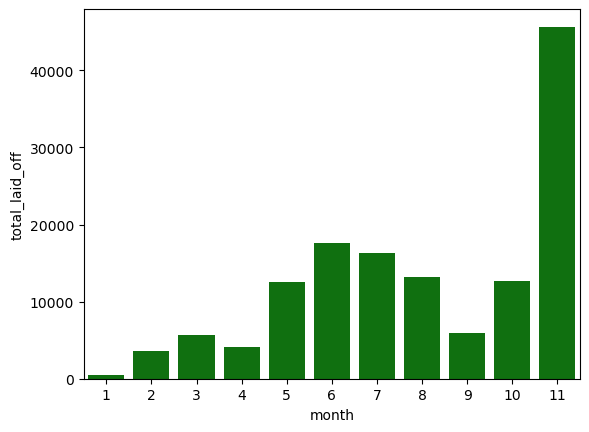

In [14]:
df_lay["month"] = df_lay['date'].dt.month
df_month = df_lay.groupby("month").sum().reset_index()
sns.barplot(data=df_month, x="month", y="total_laid_off", color='green')

It started with layoffs in summer and peaked in November (~45k) with Twitter, Meta, Amazon laid-off employees in mass

/tmp/ipykernel_37654/3449413438.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_industry = df_lay.groupby("industry").sum().reset_index().sort_values(by="total_laid_off", ascending=False)[:10]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Retail'),
  Text(1, 0, 'Consumer'),
  Text(2, 0, 'Transportation'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Real Estate'),
  Text(6, 0, 'Food'),
  Text(7, 0, 'Education'),
  Text(8, 0, 'Crypto'),
  Text(9, 0, 'Fitness')])

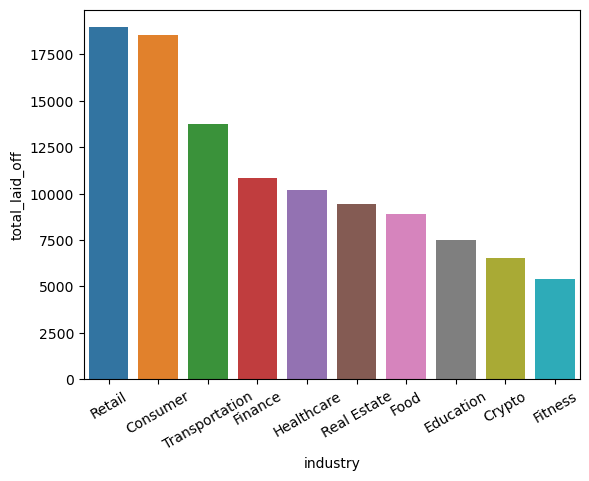

In [15]:
df_industry = df_lay.groupby("industry").sum().reset_index().sort_values(by="total_laid_off", ascending=False)[:10]
ax = sns.barplot(data=df_industry, x="industry", y="total_laid_off")
plt.xticks(rotation=30, fontsize = 'medium')

Retail and Consumer are the top 2 industries that had most layoffs.
Food, Fitness and crypto industries are also among top 10

In [16]:
df_stage = df_lay.groupby("stage")["total_laid_off"].sum().sort_values(ascending=False).reset_index()

In [17]:
df_stage['percentage'] = df_stage['total_laid_off'] / sum(df_lay['total_laid_off'])

In [18]:
others = pd.DataFrame({'stage': ['Others'], 'total_laid_off': [df_stage.loc[5:13, 'total_laid_off'].sum()], 'percentage': [df_stage.loc[5:13, 'percentage'].sum()]})

# Concatenate the new DataFrame with the original DataFrame excluding the rows 5 to 13
df_stage = pd.concat([df_stage.loc[:4], others], ignore_index=True)

([<matplotlib.patches.Wedge at 0xffff55cb8f70>,
 [Text(0.0022068560851944636, 1.0999977862642358, 'IPO'),
  Text(-1.031858483811677, -0.38114048510472776, 'Unknown'),
  Text(-0.6171712013848129, -0.9105491245293836, 'Series C'),
  Text(-0.19129563587607307, -1.083238653157636, 'Series B'),
  Text(0.14460643398836082, -1.0904535658381653, 'Series D'),
  Text(0.8790956797871834, -0.6612040424706357, 'Others')],
 [Text(0.0012037396828333436, 0.5999987925077649, '49.9%'),
  Text(-0.5628319002609147, -0.2078948100571242, '11.4%'),
  Text(-0.3366388371189888, -0.4966631588342092, '8.4%'),
  Text(-0.10434307411422165, -0.5908574471768923, '5.0%'),
  Text(0.07887623672092407, -0.5947928540935447, '4.7%'),
  Text(0.4795067344293727, -0.3606567504385285, '20.5%')])

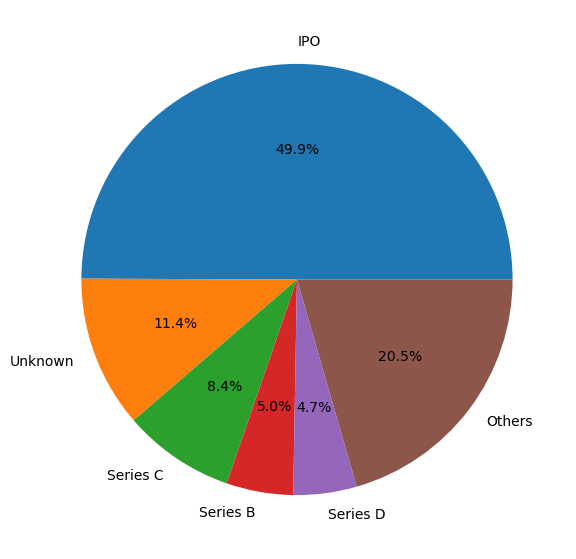

In [19]:
from matplotlib import pyplot as plt
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(df_stage["percentage"], labels = df_stage["stage"], autopct='%1.1f%%')
 
# show plot
plt.show()

50% of the companies that laid off were in IPO stage. Looks like a case of over
hire and mass fire case

In [20]:
location = df_lay['location'].value_counts().head(10).reset_index()
location

,index,location
0,SF Bay Area,252
1,New York City,108
2,Boston,40
3,Los Angeles,38
4,Seattle,33
5,Bengaluru,32
6,Berlin,31
7,London,29
8,Tel Aviv,28
9,Sao Paulo,26


In [21]:
others = pd.DataFrame({'index': ['Others'], 'location': [location.loc[5:9, 'location'].sum()]})

# Concatenate the new DataFrame with the original DataFrame excluding the rows 5 to 9
location = pd.concat([location.loc[:4], others], ignore_index=True)
location

,index,location
0,SF Bay Area,252
1,New York City,108
2,Boston,40
3,Los Angeles,38
4,Seattle,33
5,Others,146


([<matplotlib.patches.Wedge at 0xffff55d223e0>,
 [Text(0.31210364237559884, 1.05479444273085, 'SF Bay Area'),
  Text(-1.0996435390873966, 0.02800155251669534, 'New York City'),
  Text(-0.8210722857894903, -0.7320111348254353, 'Boston'),
  Text(-0.47402568058012823, -0.9926226141643896, 'Los Angeles'),
  Text(-0.0923062132011824, -1.096120232002155, 'Seattle'),
  Text(0.8097951540254145, -0.7444674663925586, 'Others')],
 [Text(0.17023835038669025, 0.5753424233077363, '40.8%'),
  Text(-0.5998055667749436, 0.015273574100015638, '17.5%'),
  Text(-0.44785761043063105, -0.3992788008138738, '6.5%'),
  Text(-0.25855946213461534, -0.5414305168169397, '6.2%'),
  Text(-0.050348843564281306, -0.5978837629102662, '5.3%'),
  Text(0.44170644765022604, -0.40607316348685013, '23.7%')])

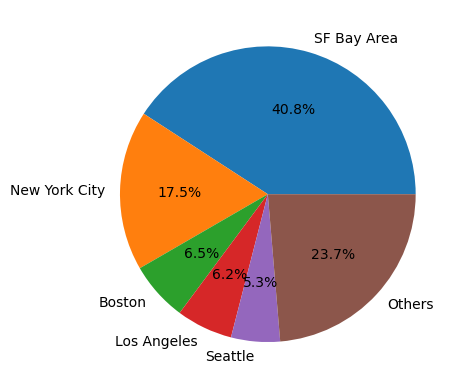

In [22]:
# Creating plot
plt.pie(location["location"], labels = location["index"], autopct='%1.1f%%')
 
# show plot
plt.show()

74% of the employees who were laid-off were working in Bay area, New York and Seattle

## Job seekers and Recruiters can leverage this analysis

This analysis can be used by:\
● Job seekers: can use these insights when considering which industry, location,
or financial status could help them finding a stable job\
● Recruiters: can use these insights to figure out current HR trends and it can be
an opportunity to gain talented people who just lost their jobs

### Point to note:

However, we need to be careful when interpreting the insights. For example, SF Bay
Area takes up more than 40% of layoffs. It doesn’t mean that working at the area is
unstable. The result was drawn because originally there are many companies and
employees in that area.

## Meta layoffs analysis
● 13% employees.\
● 11,000 employees in total.\
● Our data contains 2,092 employees’ information

In [23]:
df = pd.read_csv("meta.csv", encoding= 'unicode_escape')
df.head()

,JobTitle,DepartmentRaw,Location,Visa,YoE,DepartmentClean
0,Research Scientist,(ML / non-ML) Software Engineering,San Francisco Bay Area,No,3-Jan,Engineering
1,Agency Partner Manager,Account Management/Sales,"Austin, TX",No,6-Apr,Sales
2,General Ledger Accountant,Accounting,San Francisco Bay Area,No,6-Apr,Other
3,Executive Administrative Partner,Admin,Miami,No,10+,Other
4,Partner Solutions Manager,"Ads Partnerships, Product",Singapore,Yes,10+,Product


In [24]:
df['YoE'] = df['YoE'].replace(['3-Jan','6-Apr','10-Jul']
                                , ['1-3','4-6','7-10'])

In [25]:
department = df.groupby("DepartmentClean").count().sort_values(by="JobTitle", ascending=True).reset_index()

<BarContainer object of 12 artists>

Text(0.5, 1.0, 'Department')

Text(0.5, 0, 'Values')

Text(0, 0.5, 'Department')

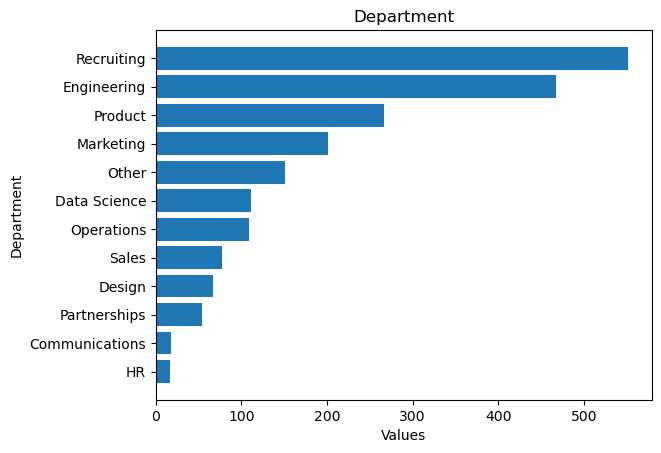

In [26]:
import matplotlib.pyplot as plt

# Create a horizontal bar chart
plt.barh(department["DepartmentClean"], department["JobTitle"])

# Add a title and axis labels
plt.title('Department')
plt.xlabel('Values')
plt.ylabel('Department')

# Show the chart
plt.show()

• Recruiting and engineering were the most impact Departments

• These 2 departments comprise 50% of all self-reported layoffs

• 5% of the Layoffs were data science jobs

In [27]:
hm = df.groupby(['DepartmentClean','YoE']).count().reset_index()

/tmp/ipykernel_37654/3616710774.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  hm2 = hm.pivot("DepartmentClean", "YoE", "JobTitle")


<AxesSubplot: xlabel='YoE', ylabel='DepartmentClean'>

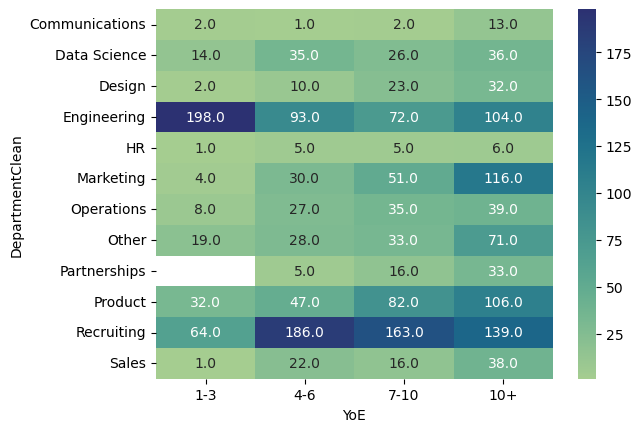

In [28]:
hm2 = hm.pivot("DepartmentClean", "YoE", "JobTitle")
hm2= hm2.reindex(columns=[col for col in hm2.columns if col != '10+'] + ['10+'])

# Plot the heatmap
sns.heatmap(hm2, annot=True, fmt=".1f", cmap="crest")

### Laid-off Junior employees mainly belonged to Engineering department 

●  Engineering layoffs targeted mainly junior employees

●  Product, marketing and
sales layoffs consisted
mainly of senior employees

In [29]:
df['Visa'] = df['Visa'].replace(['US Citizen','US citizen','I am a citizen of US','Depends whether local or not', 'Green Card/Permanent Resident','U.S. Citizen'\
                                'Can be places on LOC', 'US permanent resident', 'Visa not needed', 'Potentially jumping on my partners visa soon',"I'm on a green card", "Us citizen"]
                                , 'No')

In [30]:
df["Visa"] = df["Visa"].apply(lambda x: "Yes" if x != "No" else x)


In [31]:
hm = df.groupby(['DepartmentClean','Visa']).count().reset_index()
hm2 = hm.pivot("DepartmentClean", "Visa", "JobTitle")

/tmp/ipykernel_37654/1185608121.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  hm2 = hm.pivot("DepartmentClean", "Visa", "JobTitle")


<AxesSubplot: xlabel='Visa', ylabel='DepartmentClean'>

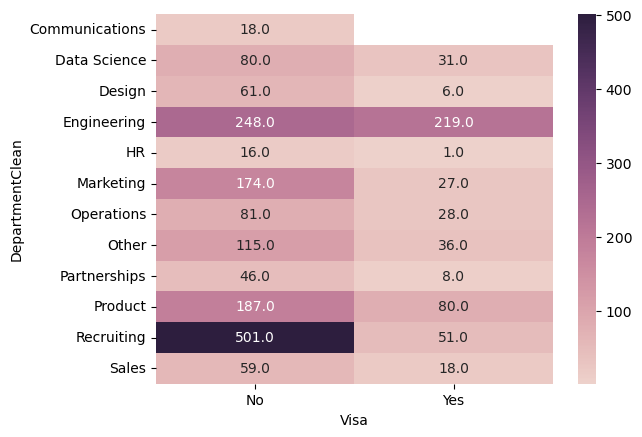

In [32]:
sns.heatmap(hm2, annot=True, fmt=".1f", cmap=sns.cubehelix_palette(as_cmap=True))

### Engineering requires the most US visa support

● 46% of the laid-off
engineering’s will require
US visa support

● 26% data science
department employees
need US visa support

● Although recruiting makes
up the largest percentage
of layoffs (26%), only 8%
of them requires US visa
support